<a href="https://colab.research.google.com/github/Mahdi-N-13/security-adversarioal-dos-attack/blob/main/01_first_impression_on_second_data_%2B_NN___security_adversarioal_dos_attack_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv('/content/drive/MyDrive/Copy of file2.csv')
data = data.drop(data.columns[0],axis=1)
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,15
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,21
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,21
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0,20
125968,8,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1,21
125969,0,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1,18
125970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,20


In [15]:
data = data[list(data.columns[:-2])+list(data.columns[[-1,-2]])]

In [16]:
n_f = len(data.iloc[0])-1
l = []
for i in range(n_f):
  lsdi = len(set(data.iloc[:,i]))
  print(data.columns[i],lsdi)
  if lsdi == 1:
    print(data.iloc[0,i])
    l.append(data.columns[i])
data = data.drop(l,axis=1)
n_f -= len(l)

duration 2981
src_bytes 3341
dst_bytes 9326
land 2
wrong_fragment 3
urgent 4
hot 28
num_failed_logins 6
logged_in 2
num_compromised 88
root_shell 2
su_attempted 3
num_root 82
num_file_creations 35
num_shells 3
num_access_files 10
num_outbound_cmds 1
0
is_host_login 2
is_guest_login 2
count 512
srv_count 509
serror_rate 89
srv_serror_rate 86
rerror_rate 82
srv_rerror_rate 62
same_srv_rate 101
diff_srv_rate 95
srv_diff_host_rate 60
dst_host_count 256
dst_host_srv_count 256
dst_host_same_srv_rate 101
dst_host_diff_srv_rate 101
dst_host_same_src_port_rate 101
dst_host_srv_diff_host_rate 75
dst_host_serror_rate 101
dst_host_srv_serror_rate 100
dst_host_rerror_rate 101
dst_host_srv_rerror_rate 101
level 22


In [17]:
safe = np.array(data['attack'] == 0)
attc = np.invert(safe)
print('number of safes:  ' , len(safe),'  ',100*len(safe)/(len(safe)+len(attc)), ' %')
print('number of attacks:' , len(attc),'  ',100*len(attc)/(len(safe)+len(attc)), ' %')

number of safes:   125972    50.0  %
number of attacks: 125972    50.0  %


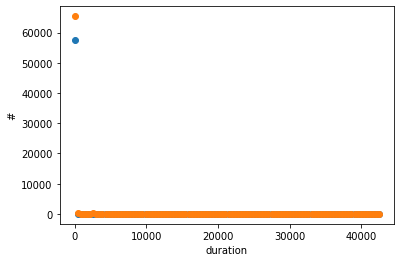

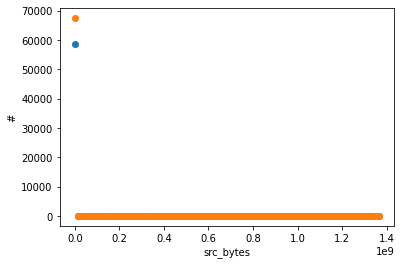

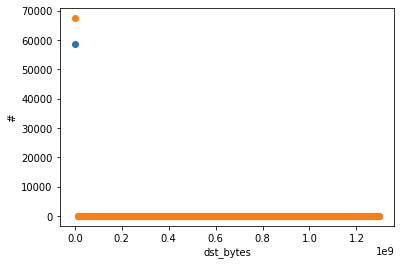

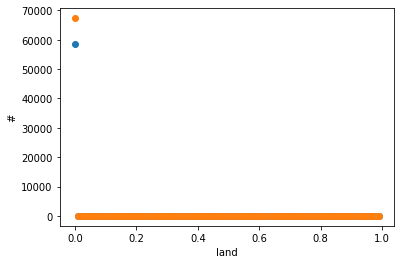

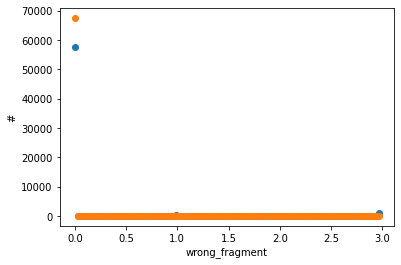

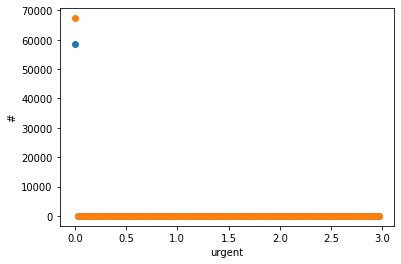

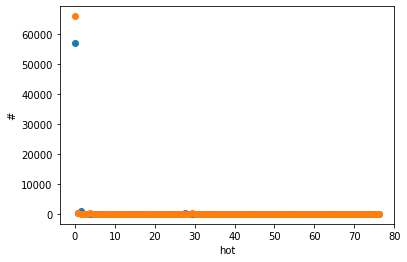

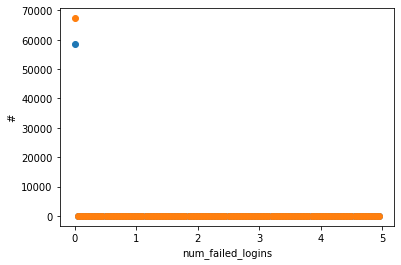

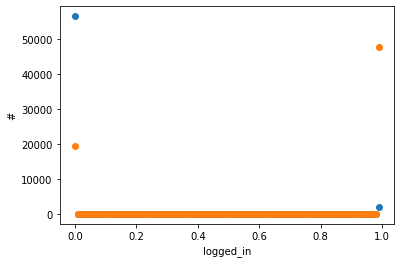

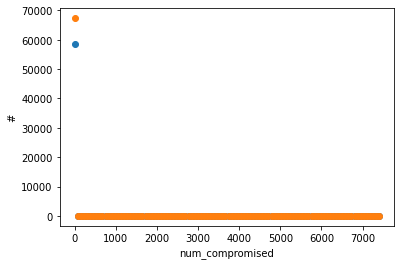

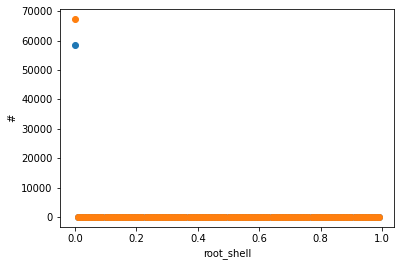

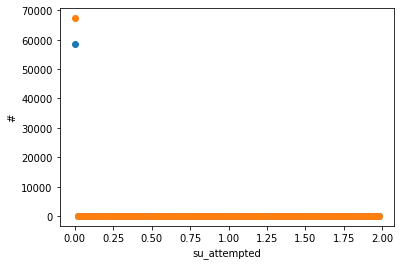

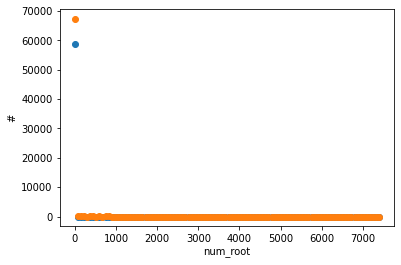

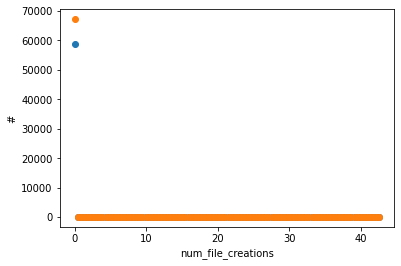

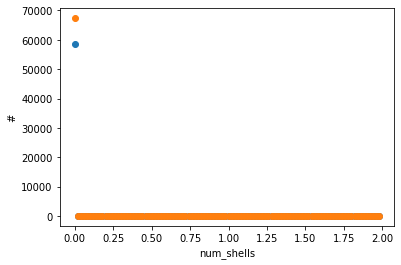

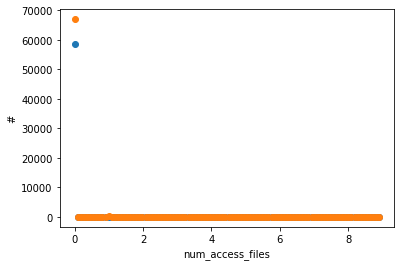

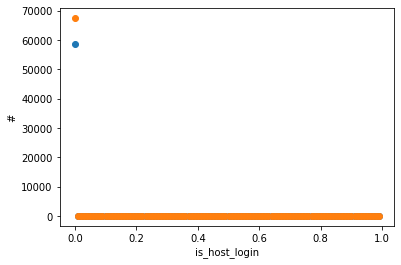

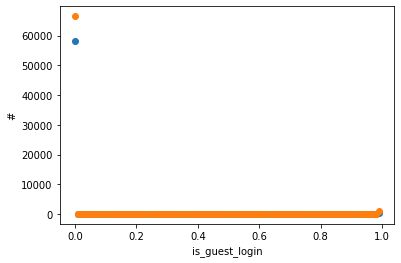

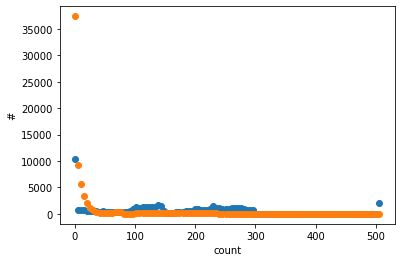

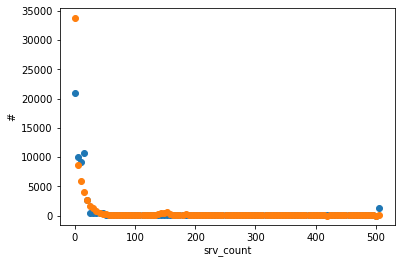

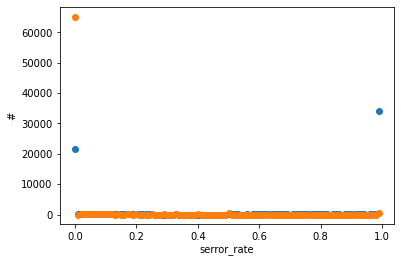

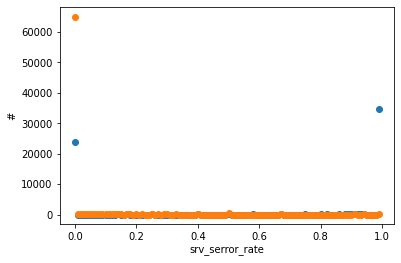

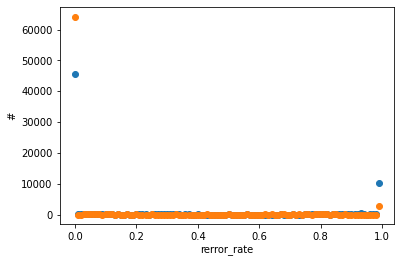

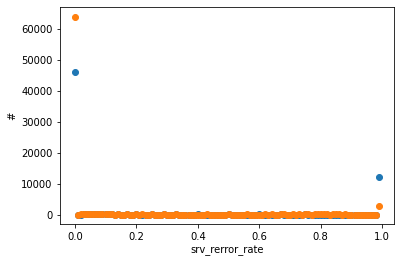

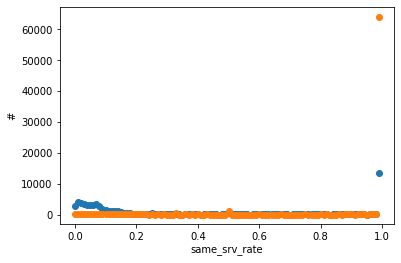

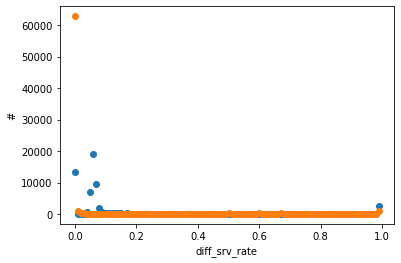

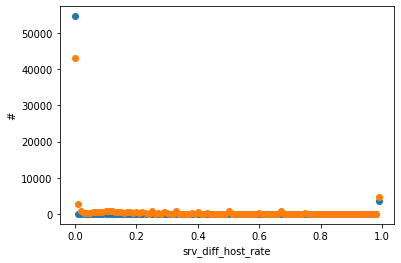

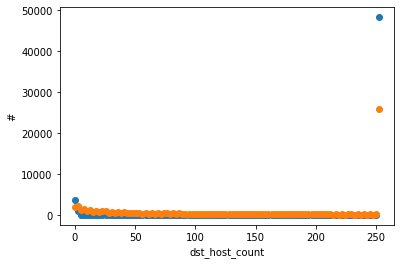

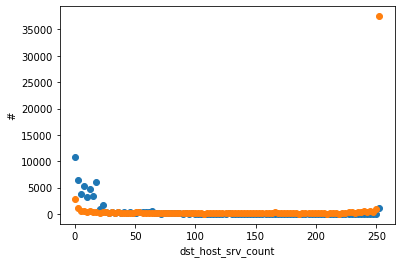

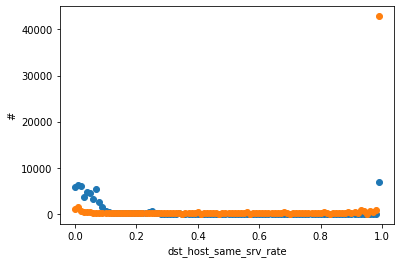

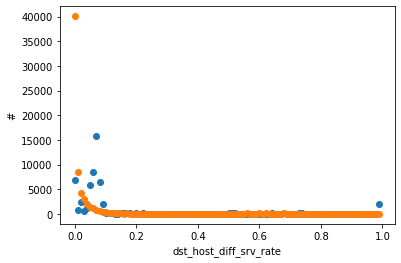

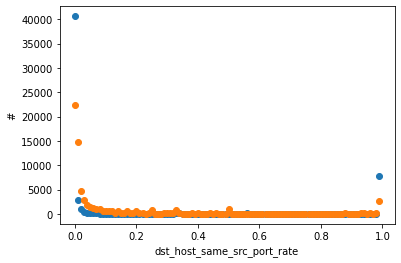

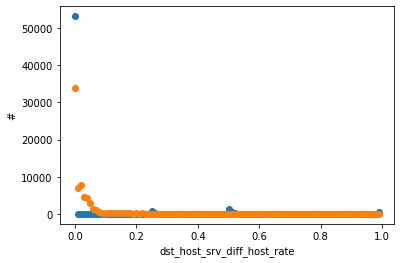

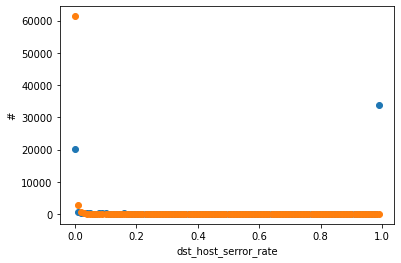

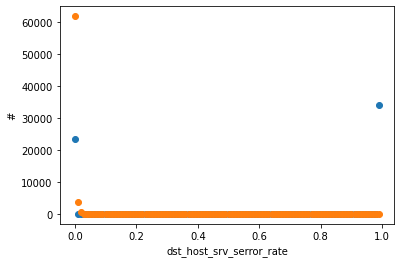

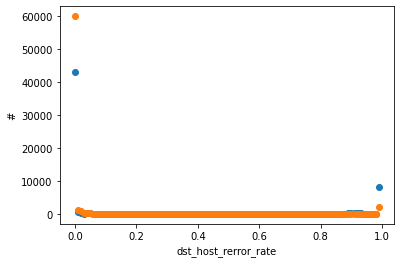

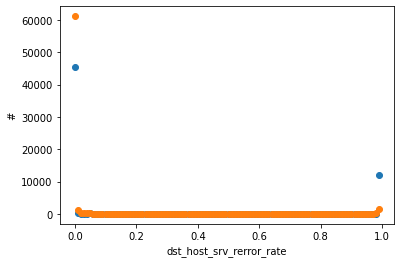

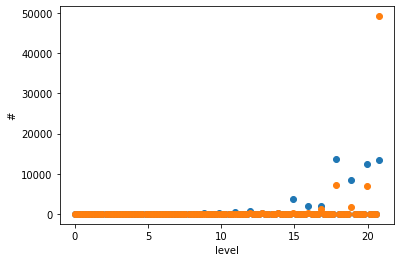

In [18]:
I = np.zeros(n_f)
for i in range(n_f):
  minn,maxx = data.iloc[:,i].min(),data.iloc[:,i].max()
  Sa,Sax = np.histogram(np.array(data.iloc[safe,i]),range=(minn,maxx),bins=100)
  At,Atx = np.histogram(np.array(data.iloc[attc,i]),range=(minn,maxx),bins=100)
  c = (Sa+At)
  c_s = c.sum()
  nz = Sa!=0
  if nz.any():
    I[i] = (Sa[nz]/c_s*np.log2((Sa[nz]/c_s)/(Sa.sum()/c_s)/(c[nz]/c_s))).sum()
  nz = At!=0
  if nz.any():
    I[i] += (At[nz]/c_s*np.log2((At[nz]/c_s)/(At.sum()/c_s)/(c[nz]/c_s))).sum()
  plt.scatter(Sax[:-1],Sa)
  plt.scatter(Atx[:-1],At)
  plt.xlabel(data.columns[i])
  plt.ylabel('#')
  plt.show()

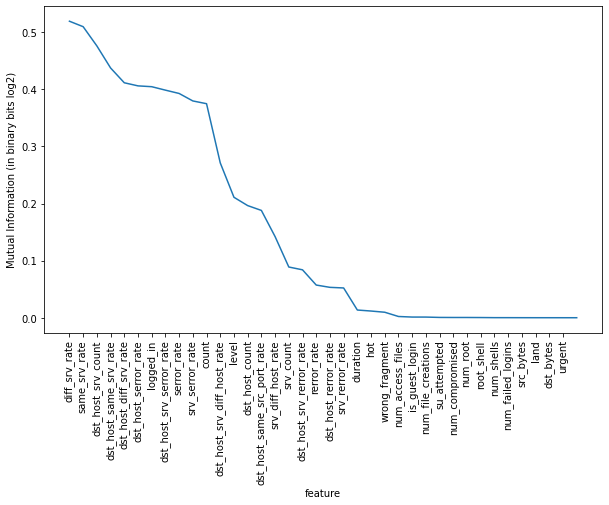

In [19]:
plt.figure(figsize=(10,6))
plt.plot(np.flip(np.sort(I)))
plt.xlabel('feature')
plt.xticks(range(n_f-1),data.columns[np.flip(np.argsort(I))],rotation='vertical')
plt.ylabel('Mutual Information (in binary bits log2)')
plt.show()

In [20]:
print ("{:<30} {:<15} ".format('feature','Mutual Information (in binary bits log2)'))
for i in np.flip(np.argsort(I)):
  print("{:<30} {:<15}".format(data.columns[i],np.round(I[i],3)))

feature                        Mutual Information (in binary bits log2) 
diff_srv_rate                  0.519          
same_srv_rate                  0.51           
dst_host_srv_count             0.476          
dst_host_same_srv_rate         0.438          
dst_host_diff_srv_rate         0.412          
dst_host_serror_rate           0.406          
logged_in                      0.405          
dst_host_srv_serror_rate       0.399          
serror_rate                    0.393          
srv_serror_rate                0.38           
count                          0.375          
dst_host_srv_diff_host_rate    0.271          
level                          0.211          
dst_host_count                 0.196          
dst_host_same_src_port_rate    0.188          
srv_diff_host_rate             0.142          
srv_count                      0.089          
dst_host_srv_rerror_rate       0.084          
rerror_rate                    0.057          
dst_host_rerror_rate           0.0

In [21]:
data = data[list(data.columns[np.flip(np.argsort(I))])+list(data.columns[[-1]])]

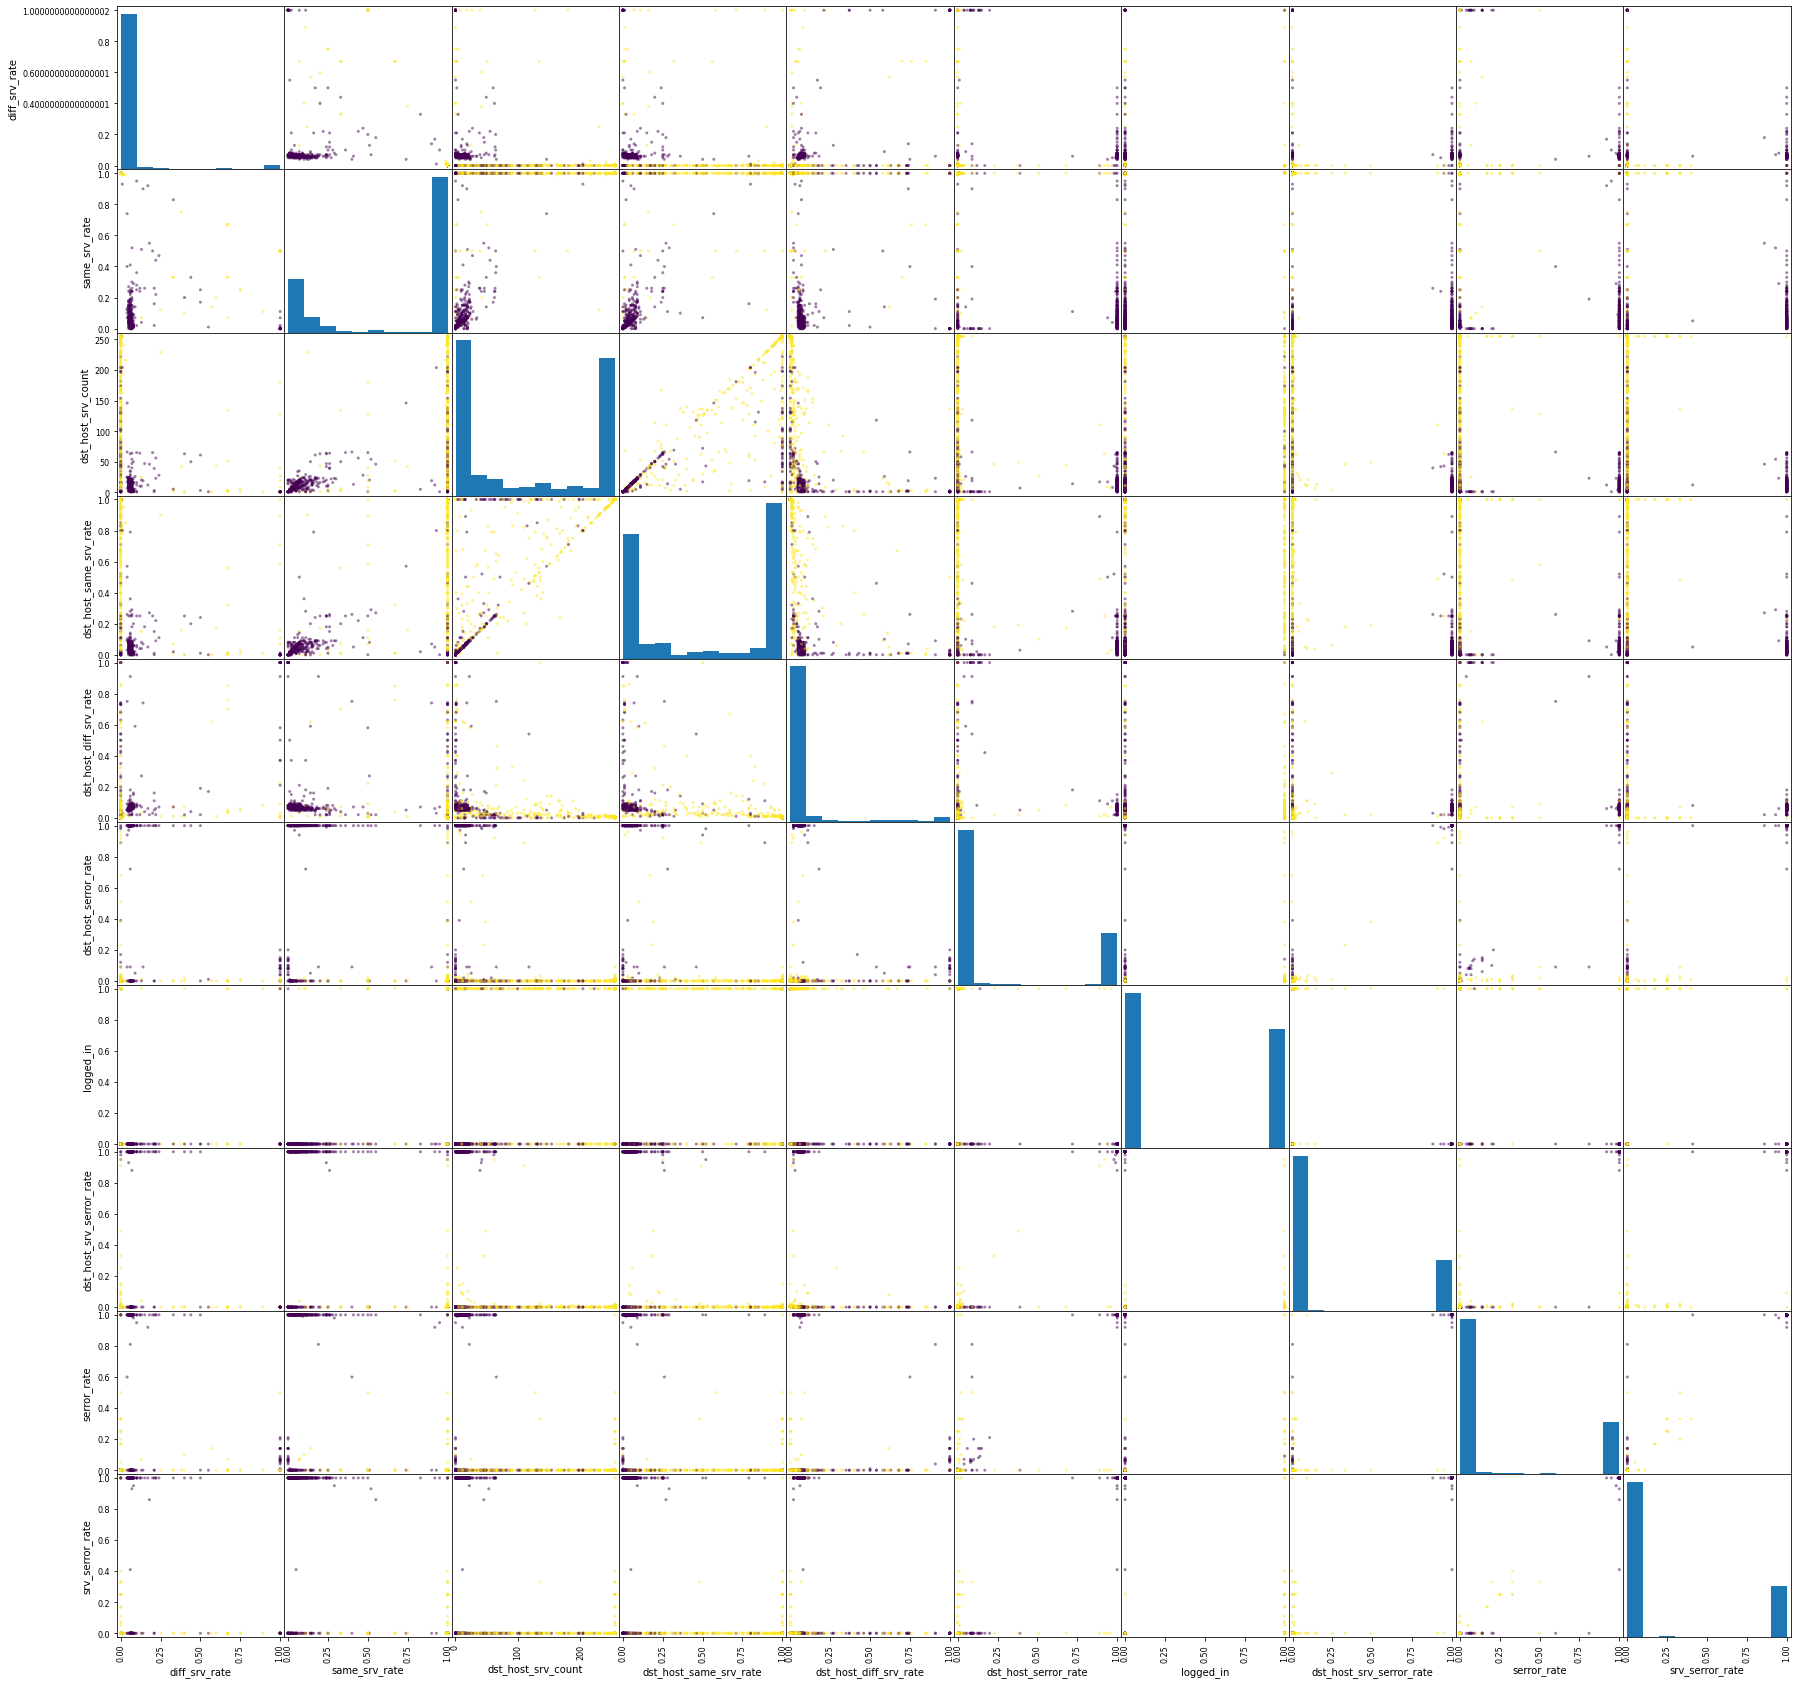

In [24]:
# C =  ['r' if x==1 else 'g' for x in data.attack]
new_nf = 10
data_s = data.sample(1000)
data_c = data_s.attack
data_s = data_s.iloc[:,:new_nf]
pd.plotting.scatter_matrix(data_s, figsize=(new_nf*3,new_nf*3), c = data_c)
plt.show()

In [35]:
I_ff = np.zeros((3,n_f,n_f))
for i in range(n_f-1):
  mini,maxi = data.iloc[:,i].min(),data.iloc[:,i].max()
  for j in range(i+1,n_f):
    minj,maxj = data.iloc[:,j].min(),data.iloc[:,j].max()
    Pij = np.histogram2d(data.iloc[:,i],data.iloc[:,j], bins=10, range=[[mini, maxi], [minj, maxj]])[0]
    Pij /= Pij.sum()
    Pi = Pij.sum(axis=1)
    Pj = Pij.sum(axis=0)
    for x in range(10):
      nz = Pij[x]!=0
      I_ff[0,i,j] += (Pij[x]*np.log2( (Pij[x]) / (Pi[x]*Pj) ))[nz].sum()
    
    Pij = np.histogram2d(data.iloc[safe,i],data.iloc[safe,j], bins=10, range=[[mini, maxi], [minj, maxj]])[0]
    Pij /= Pij.sum()
    Pi = Pij.sum(axis=1)
    Pj = Pij.sum(axis=0)
    for x in range(10):
      nz = Pij[x]!=0
      I_ff[1,i,j] += (Pij[x]*np.log2( (Pij[x]) / (Pi[x]*Pj) ))[nz].sum()
    
    Pij = np.histogram2d(data.iloc[attc,i],data.iloc[attc,j], bins=10, range=[[mini, maxi], [minj, maxj]])[0]
    Pij /= Pij.sum()
    Pi = Pij.sum(axis=1)
    Pj = Pij.sum(axis=0)
    for x in range(10):
      nz = Pij[x]!=0
      I_ff[2,i,j] += (Pij[x]*np.log2( (Pij[x]) / (Pi[x]*Pj) ))[nz].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encoun

In [57]:
I_ff[0] = I_ff[0]+I_ff[0].T
I_ff[1] = I_ff[1]+I_ff[1].T
I_ff[2] = I_ff[2]+I_ff[2].T

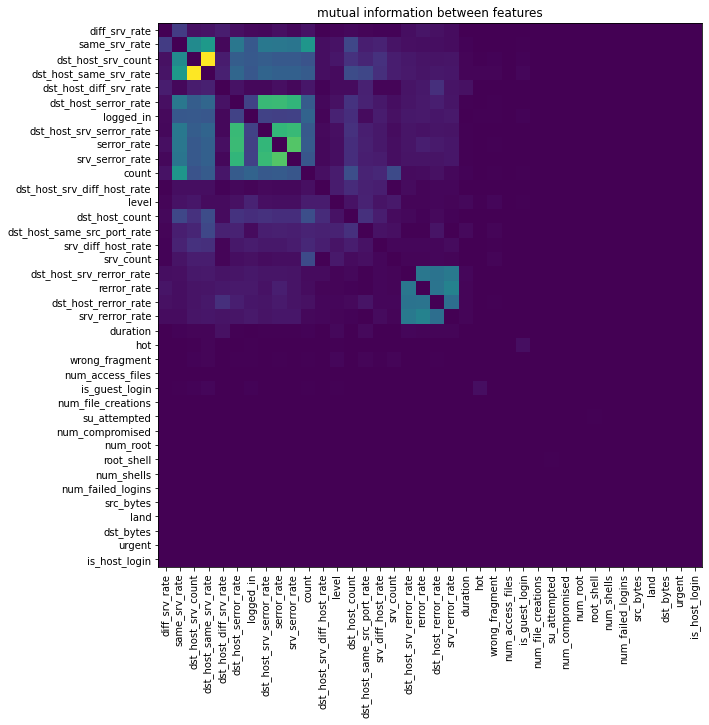

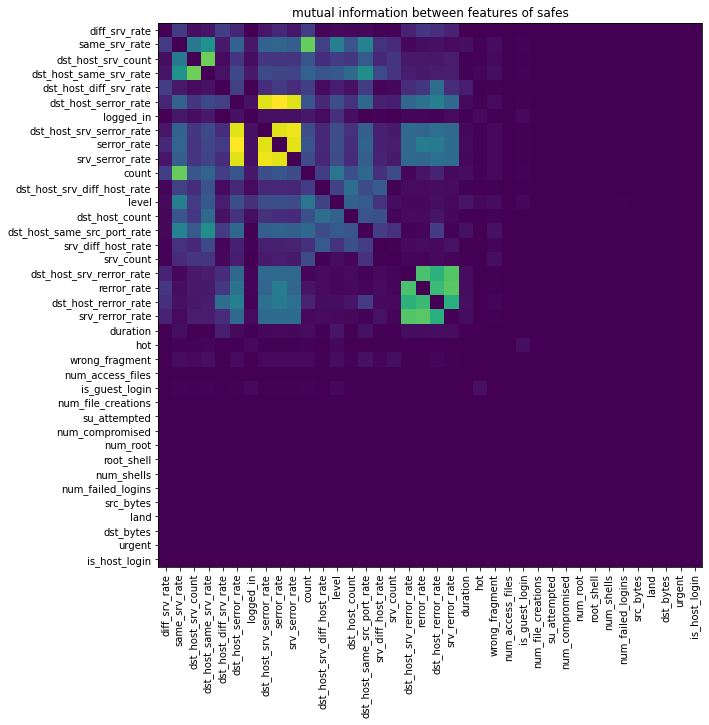

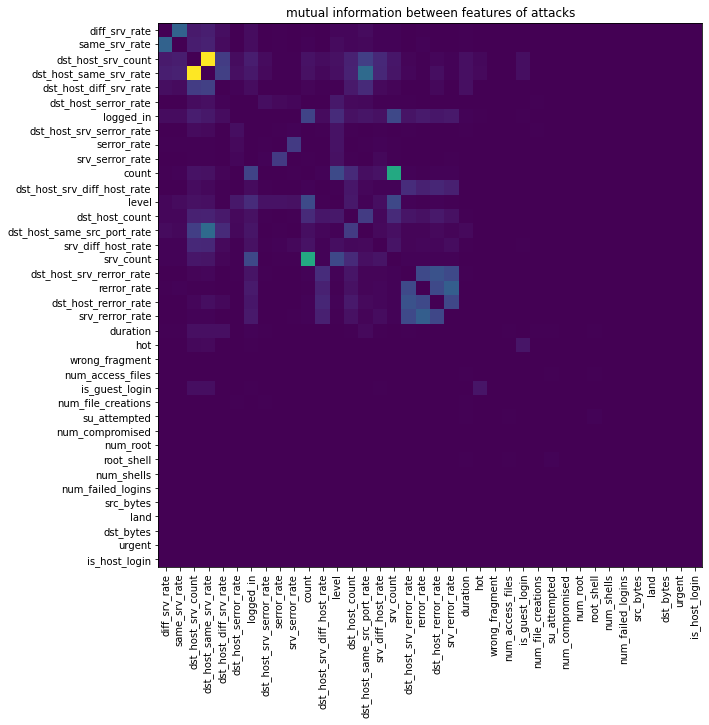

In [58]:
plt.figure(figsize=(10,10))
plt.title('mutual information between features')
plt.imshow(I_ff[0])
plt.xticks(range(n_f),data.columns[:-1],rotation='vertical')
plt.yticks(range(n_f),data.columns[:-1])
plt.show()

plt.figure(figsize=(10,10))
plt.title('mutual information between features of safes')
plt.imshow(I_ff[1])
plt.xticks(range(n_f),data.columns[:-1],rotation='vertical')
plt.yticks(range(n_f),data.columns[:-1])
plt.show()

plt.figure(figsize=(10,10))
plt.title('mutual information between features of attacks')
plt.imshow(I_ff[2])
plt.xticks(range(n_f),data.columns[:-1],rotation='vertical')
plt.yticks(range(n_f),data.columns[:-1])
plt.show()

Text(0, 0.5, '$I(f,label)$')

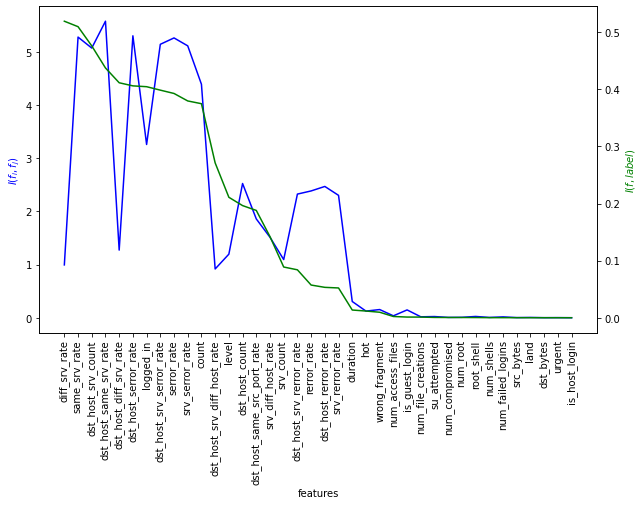

In [77]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
plt.xlabel('features')
plt.xticks(range(n_f),data.columns[:-1],rotation='vertical')
ax2 = ax1.twinx()
ax1.plot(I_ff[0].sum(axis=0),c='b')
ax2.plot(np.flip(np.sort(I)),c='g')
ax1.set_ylabel('$I(f_i,f_j)$', color='b')
ax2.set_ylabel('$I(f,label)$', color='g')

Text(0, 0.5, '$I(f,label)$')

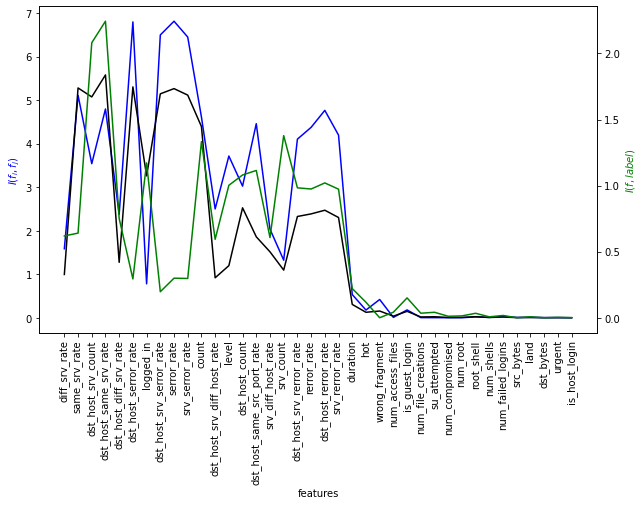

In [79]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
plt.xlabel('features')
plt.xticks(range(n_f),data.columns[:-1],rotation='vertical')
ax2 = ax1.twinx()
ax1.plot(I_ff[1].sum(axis=0),c='b')
ax2.plot(I_ff[2].sum(axis=0),c='g')
ax1.plot(I_ff[0].sum(axis=0),c='k')
ax1.set_ylabel('$I(f_i,f_j)$', color='b')
ax2.set_ylabel('$I(f,label)$', color='g')

In [80]:
len(data)

125972

In [81]:
new_nf = 20
train_size = 50*10**3
test_size = 50*10**3

x = data.sample(n=len(data.iloc[:,0]))
X_train = x.iloc[:train_size,:new_nf]
Y_train = np.array(x['attack'][:train_size],dtype=bool)
from tensorflow import keras as ks
model = ks.Sequential()
model.add(ks.layers.Dense(8, activation=ks.activations.relu, input_dim = new_nf)  )
model.add(ks.layers.Dense(5, activation=ks.activations.relu)  )
model.add(ks.layers.Dense(2, activation=ks.activations.sigmoid)  )
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='adam',
              loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [84]:
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.8943
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1502 - accuracy: 0.9452
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0997 - accuracy: 0.9621
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0785 - accuracy: 0.9706
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0712 - accuracy: 0.9736
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9751
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0634 - accuracy: 0.9766
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0623 - accuracy: 0.9769
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0603 - accuracy: 0.9784
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0589 - accurac

In [88]:
X_test = x.iloc[-test_size:,:new_nf]
Y_test = np.array(x['attack'][-test_size:],dtype=bool)

In [93]:
print('\nTest accuracy:', model.evaluate(X_test,  Y_test, verbose=2)[1])

1563/1563 - 2s - loss: 0.0556 - accuracy: 0.9800 - 2s/epoch - 1ms/step

Test accuracy: 0.9799799919128418


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 4s 2ms/step - loss: 3.0829 - accuracy: 0.7873
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3061 - accuracy: 0.8661
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2775 - accuracy: 0.8846
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.8875
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2711 - accuracy: 0.8894
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2667 - accuracy: 0.8904
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.8916
Epoch 8/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2662 - accuracy: 0.8924
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.8920
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2665 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 3s - loss: 0.2541 - accuracy: 0.8989 - 3s/epoch - 2ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 4s 2ms/step - loss: 0.3181 - accuracy: 0.8677
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2636 - accuracy: 0.8855
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.8911
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2541 - accuracy: 0.8936
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2518 - accuracy: 0.8949
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2510 - accuracy: 0.8956
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2490 - accuracy: 0.8975
Epoch 8/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2493 - accuracy: 0.8987
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.8996
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2467 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.2445 - accuracy: 0.9022 - 2s/epoch - 2ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 2ms/step - loss: 0.8746 - accuracy: 0.8424
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2587 - accuracy: 0.8954
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2404 - accuracy: 0.8995
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2296 - accuracy: 0.9016
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2272 - accuracy: 0.9032
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2258 - accuracy: 0.9022
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2216 - accuracy: 0.9040
Epoch 8/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2163 - accuracy: 0.9043
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2099 - accuracy: 0.9059
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2084 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.2022 - accuracy: 0.9124 - 2s/epoch - 991us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 2s 1ms/step - loss: 0.3444 - accuracy: 0.8695
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2409 - accuracy: 0.8950
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2350 - accuracy: 0.8953
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2318 - accuracy: 0.8981
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2356 - accuracy: 0.8959
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2298 - accuracy: 0.8997
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2309 - accuracy: 0.8987
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2302 - accuracy: 0.8985
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2269 - accuracy: 0.8995
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2280 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.2148 - accuracy: 0.9044 - 2s/epoch - 997us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 2s 1ms/step - loss: 0.3087 - accuracy: 0.8762
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2329 - accuracy: 0.8928
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2204 - accuracy: 0.8953
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2182 - accuracy: 0.8983
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2159 - accuracy: 0.8990
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2141 - accuracy: 0.8995
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2112 - accuracy: 0.9005
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2111 - accuracy: 0.9011
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2081 - accuracy: 0.9007
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2055 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.1988 - accuracy: 0.9094 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 2s 1ms/step - loss: 1.9358 - accuracy: 0.8370
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2450 - accuracy: 0.8934
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2289 - accuracy: 0.8986
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2238 - accuracy: 0.8971
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2204 - accuracy: 0.8955
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2178 - accuracy: 0.8961
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2157 - accuracy: 0.8946
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2171 - accuracy: 0.8955
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2160 - accuracy: 0.8978
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2130 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.2096 - accuracy: 0.8963 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 2s 1ms/step - loss: 1.0248 - accuracy: 0.8718
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2261 - accuracy: 0.9063
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2090 - accuracy: 0.9141
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1982 - accuracy: 0.9179
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1929 - accuracy: 0.9192
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1914 - accuracy: 0.9203
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1893 - accuracy: 0.9211
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1875 - accuracy: 0.9223
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1853 - accuracy: 0.9228
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1834 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.1755 - accuracy: 0.9258 - 2s/epoch - 994us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.8908
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2071 - accuracy: 0.9119
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1868 - accuracy: 0.9216
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1830 - accuracy: 0.9234
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1753 - accuracy: 0.9290
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1726 - accuracy: 0.9310
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1680 - accuracy: 0.9331
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1656 - accuracy: 0.9338
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1647 - accuracy: 0.9355
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1618 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.1522 - accuracy: 0.9438 - 2s/epoch - 979us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 0.3054 - accuracy: 0.9099
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1320 - accuracy: 0.9640
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0999 - accuracy: 0.9697
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0929 - accuracy: 0.9700
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0924 - accuracy: 0.9695
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0900 - accuracy: 0.9702
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0884 - accuracy: 0.9712
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0876 - accuracy: 0.9707
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0876 - accuracy: 0.9707
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0860 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0810 - accuracy: 0.9728 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 2s 1ms/step - loss: 0.2820 - accuracy: 0.9120
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1514 - accuracy: 0.9368
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1293 - accuracy: 0.9473
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1166 - accuracy: 0.9543
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1107 - accuracy: 0.9604
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1017 - accuracy: 0.9643
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0980 - accuracy: 0.9674
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0941 - accuracy: 0.9691
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0909 - accuracy: 0.9707
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0897 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0798 - accuracy: 0.9704 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 0.9649 - accuracy: 0.8754
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2646 - accuracy: 0.9113
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2532 - accuracy: 0.9144
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2462 - accuracy: 0.9163
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2409 - accuracy: 0.9183
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2380 - accuracy: 0.9201
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2335 - accuracy: 0.9216
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2254 - accuracy: 0.9240
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2109 - accuracy: 0.9288
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1633 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0827 - accuracy: 0.9700 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 3.0941 - accuracy: 0.8534
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2026 - accuracy: 0.9169
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1585 - accuracy: 0.9405
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1287 - accuracy: 0.9523
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1146 - accuracy: 0.9566
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1051 - accuracy: 0.9583
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0946 - accuracy: 0.9638
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0888 - accuracy: 0.9665
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0846 - accuracy: 0.9685
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0816 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0665 - accuracy: 0.9725 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 0.6279 - accuracy: 0.8466
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2198 - accuracy: 0.8963
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1741 - accuracy: 0.9289
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1397 - accuracy: 0.9460
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1168 - accuracy: 0.9534
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1021 - accuracy: 0.9599
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0925 - accuracy: 0.9640
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9677
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0807 - accuracy: 0.9710
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0777 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0669 - accuracy: 0.9788 - 2s/epoch - 999us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 0.2426 - accuracy: 0.9032
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1143 - accuracy: 0.9589
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0840 - accuracy: 0.9704
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0759 - accuracy: 0.9728
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0731 - accuracy: 0.9735
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0703 - accuracy: 0.9743
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0679 - accuracy: 0.9746
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0669 - accuracy: 0.9756
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0657 - accuracy: 0.9750
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0641 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0548 - accuracy: 0.9791 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 2.8803 - accuracy: 0.8879
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1394 - accuracy: 0.9547
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1100 - accuracy: 0.9607
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0995 - accuracy: 0.9646
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0936 - accuracy: 0.9674
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0886 - accuracy: 0.9693
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9713
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0815 - accuracy: 0.9733
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0800 - accuracy: 0.9731
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0753 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0628 - accuracy: 0.9796 - 2s/epoch - 983us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 0.4655 - accuracy: 0.8850
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1497 - accuracy: 0.9470
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1157 - accuracy: 0.9583
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0957 - accuracy: 0.9637
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0865 - accuracy: 0.9667
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0796 - accuracy: 0.9697
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0723 - accuracy: 0.9715
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0694 - accuracy: 0.9723
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0674 - accuracy: 0.9726
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0643 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0548 - accuracy: 0.9797 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 0.7768 - accuracy: 0.8560
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1269 - accuracy: 0.9530
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0979 - accuracy: 0.9632
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0817 - accuracy: 0.9696
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0715 - accuracy: 0.9726
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0661 - accuracy: 0.9741
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0613 - accuracy: 0.9751
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0575 - accuracy: 0.9773
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0565 - accuracy: 0.9782
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0533 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0488 - accuracy: 0.9847 - 2s/epoch - 1ms/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 2.4986 - accuracy: 0.8561
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1877 - accuracy: 0.9426
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1749 - accuracy: 0.9567
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1517 - accuracy: 0.9624
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1338 - accuracy: 0.9650
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1218 - accuracy: 0.9675
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1192 - accuracy: 0.9689
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1098 - accuracy: 0.9699
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1137 - accuracy: 0.9702
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0980 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0628 - accuracy: 0.9779 - 2s/epoch - 984us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 2s 1ms/step - loss: 4.0517 - accuracy: 0.8952
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.9594 - accuracy: 0.9295
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0884 - accuracy: 0.9402
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.8431 - accuracy: 0.9452
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.8664 - accuracy: 0.9524
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.7525 - accuracy: 0.9553
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.7431 - accuracy: 0.9592
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6858 - accuracy: 0.9617
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6637 - accuracy: 0.9630
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4922 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0761 - accuracy: 0.9680 - 2s/epoch - 988us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 0.4228 - accuracy: 0.8869
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1720 - accuracy: 0.9182
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1270 - accuracy: 0.9397
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0990 - accuracy: 0.9602
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0858 - accuracy: 0.9657
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0828 - accuracy: 0.9671
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0800 - accuracy: 0.9693
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0794 - accuracy: 0.9690
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0796 - accuracy: 0.9696
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0741 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0570 - accuracy: 0.9728 - 2s/epoch - 986us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 3s 1ms/step - loss: 1.1502 - accuracy: 0.8563
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2032 - accuracy: 0.9229
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1766 - accuracy: 0.9303
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1382 - accuracy: 0.9452
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1054 - accuracy: 0.9586
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0974 - accuracy: 0.9607
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0924 - accuracy: 0.9630
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0875 - accuracy: 0.9640
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9652
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0796 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 2s - loss: 0.0729 - accuracy: 0.9690 - 2s/epoch - 1ms/step


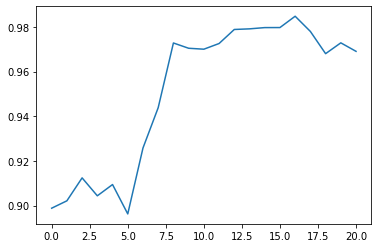

In [104]:
from timeit import default_timer as timer
Y_train = np.array(x['attack'][:train_size],dtype=bool)
Y_test = np.array(x['attack'][-test_size:],dtype=bool)
N_NF = np.arange(5,26)
Acc = np.zeros(len(N_NF))
TrainTime = np.zeros(len(N_NF))
for i,new_nf in enumerate(N_NF):
  model = ks.Sequential()
  model.add(ks.layers.Dense(8, activation=ks.activations.relu, input_dim = new_nf)  )
  model.add(ks.layers.Dense(5, activation=ks.activations.relu)  )
  model.add(ks.layers.Dense(2, activation=ks.activations.sigmoid)  )
  model.compile(optimizer='adam',
              loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  X_train = x.iloc[:train_size,:new_nf]
  X_test = x.iloc[-test_size:,:new_nf]
  t0 = timer()
  model.fit(X_train, Y_train, epochs=20)
  TrainTime[i] = timer()-t0
  Acc[i] = model.evaluate(X_test,  Y_test, verbose=2)[1]

plt.plot(Acc)

Text(0, 0.5, 'Training time')

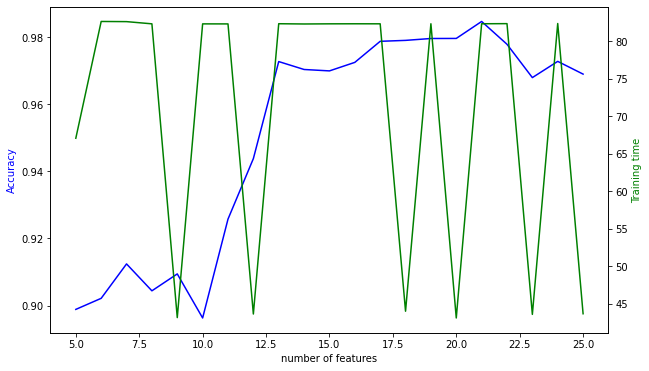

In [106]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
plt.xlabel('number of features')
ax2 = ax1.twinx()
ax1.plot(N_NF,Acc,c='b')
ax2.plot(N_NF,TrainTime,c='g')
ax1.set_ylabel('Accuracy', color='b')
ax2.set_ylabel('Training time', color='g')

In [110]:
data.to_csv('/content/drive/MyDrive/security_adversarioal_dos_attack/data_02_sorted.csv',index=False)